In [1]:
import pandas as pd
import nltk

In [2]:
# Reading csv file

df = pd.read_csv("/home/mglocadmin/Documents/Lalitha/Github_Datasets/NLP/Sentiment Analysis/Tweets.csv")
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
# Selection of releveant features

df = df[['text','airline_sentiment']]
df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [5]:
# Removal of null values and duplicates

df.dropna(axis=0, inplace=True)
df.drop_duplicates(keep='first', inplace=True)
df.shape

/tmp/ipykernel_21538/2679065161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)
/tmp/ipykernel_21538/2679065161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


(14452, 2)

### Analysis of the variables

In [6]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [7]:
df['airline_sentiment'].value_counts()

negative    9087
neutral     3067
positive    2298
Name: airline_sentiment, dtype: int64

/home/mglocadmin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

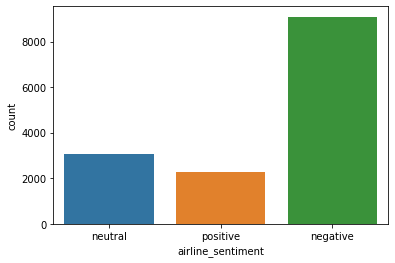

In [8]:
# Conut plot of dependent variable

import seaborn as sns
sns.countplot(df.airline_sentiment)

In [9]:
# Label Encoding of the target variable

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
 
df['airline_sentiment'] =  lb.fit_transform(df['airline_sentiment'])
df['airline_sentiment'].value_counts()

/tmp/ipykernel_21538/779950573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] =  lb.fit_transform(df['airline_sentiment'])


0    9087
1    3067
2    2298
Name: airline_sentiment, dtype: int64

In [10]:
# Creation of independent and dependent variables

X = df[['text']]
y = df[['airline_sentiment']]

### Text Preprocessing

In [11]:
from nltk.corpus import stopwords
import re

stopwords = set(stopwords.words("english"))

corpus = []

for text in X['text']:
    # Removal of special characters
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)

    # Lowering the text
    cleaned_text = cleaned_text.lower()

    # Split the text 
    cleaned_text =  cleaned_text.split()

    # Splitting the text and removing stopwords
    cleaned_text = [word for word in cleaned_text if word not in stopwords]

    # Joining the elements in a list
    cleaned_text = ' '.join(cleaned_text)

    # Appending the result to a list
    corpus.append(cleaned_text)

corpus

['virginamerica dhepburn said',
 'virginamerica plus added commercials experience tacky',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seats playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hats parody https co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teens',
 'virginamerica lt pretty graphics much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive skies u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule st

In [12]:
# Stemming 

from nltk.stem import PorterStemmer
nltk.download("punkt")

ps = PorterStemmer()
corpus = [ps.stem(word) for word in corpus]
corpus

[nltk_data] Downloading package punkt to /home/mglocadmin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['virginamerica dhepburn said',
 'virginamerica plus added commercials experience tacki',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guests faces amp little recours',
 'virginamerica really big bad th',
 'virginamerica seriously would pay flight seats playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hats parody https co mwpg grezp',
 'virginamerica wel',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teen',
 'virginamerica lt pretty graphics much better minimal iconographi',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive skies u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedule still mia

In [13]:
# Word Embedding

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1, 2))
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
X.shape

(14452, 5000)

In [15]:
# Splitting the data into train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [16]:
X_train.shape

(11561, 5000)

In [17]:
X_test.shape

(2891, 5000)

In [18]:
### Random Forest Classifier

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Create a random forest classifier
rf = RandomForestClassifier()

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Get the best parameters
best_params = rand_search.best_params_
print("Best Parameters:", best_params)

# Generate predictions with the best model
y_pred = rand_search.predict(X_test)

# Calcualte the accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy: %0.3f" % score)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm



/home/mglocadmin/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mglocadmin/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mglocadmin/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mglocadmin/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataCon

Best Parameters: {'max_depth': 19, 'n_estimators': 430}
Accuracy: 0.662


array([[1819,    4,    3],
       [ 565,   38,   11],
       [ 388,    6,   57]])

In [19]:
# Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
mb_classifier = MultinomialNB()

mb_classifier.fit(X_train, y_train)
y_pred = mb_classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy: %0.3f" % score)
cm = confusion_matrix(y_test, y_pred)
cm

/home/mglocadmin/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.769


array([[1576,  173,   77],
       [ 207,  323,   84],
       [  80,   48,  323]])